<a href="https://colab.research.google.com/github/nam3user/comp_ling-course/blob/main/Homework_%22vectors_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [ ]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-11-07 21:22:58--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 100.42K  --.-KB/s    in 0.01s   

2025-11-07 21:22:58 (6.59 MB/s) - ‘test.csv’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [ ]:
import pandas as pd

test_all = pd.read_csv('test.csv', encoding='utf-8-sig')
df = pd.DataFrame(test_all)
df['text'].head()

,text
0,Trying to have a conversation with my dad abou...
1,#latestnews 4 #newmexico #politics + #nativeam...
2,@user You are a stand up guy and a Gentleman V...
3,@user @user @user Looks like Flynn isn't too p...
4,perfect pussy clips #vanessa hudgens zac efron...


3. Извлечь столбец с текстами (макс. балл == 1)

In [ ]:
df['text'].to_list() # создаем список из столбца

['Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thing ever #caveman ',
 '#latestnews 4 #newmexico #politics + #nativeamerican + #Israel + #Palestine  -  Protesting Rise Of Alt-Right At... ',
 '@user You are a stand up guy and a Gentleman Vice President Pence ',
 "@user @user @user Looks like Flynn isn't too pleased with me, he blocked me. You blocked by Flynn too @user ",
 'perfect pussy clips #vanessa hudgens zac efron naked ',
 "i'm not even catholic, but pope francis is my dude. like i just need him to hug me and tell me everything is okay. ",
 '@user for al the crying you do about how middle America is left out-they have twice as much voting power ',
 'Sentinel Editorial: FBI’s Comey ‘had no one of middle class families. ',
 'Samsung to Bring Android 7.0 Nougat to Galaxy S6, S6 edge, Note 5, and Tab S2 - Softpedia News ',
 'Israel deems comatose Gaza man who needs treatment in West Bank  a security threat. #Palestine  via @user ',
 

4. Построить Bag-of-Words (макс. балл == 3)

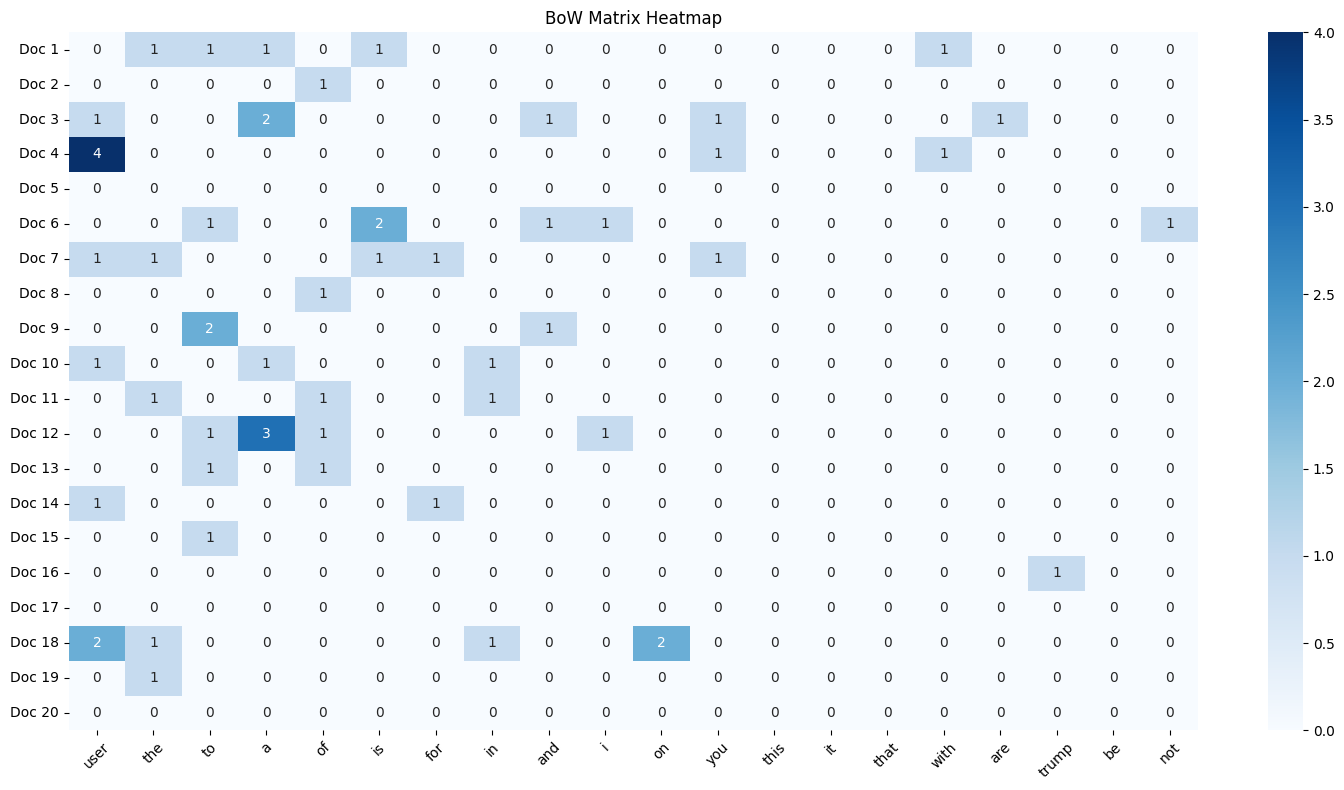

Топ-20 самых частых слов:
user: 570
the: 387
to: 268
a: 227
of: 199
is: 186
for: 176
in: 165
and: 164
i: 135
on: 118
you: 92
this: 80
it: 79
that: 79
with: 71
are: 65
trump: 62
be: 60
not: 59


In [ ]:
# Задача 1.1: Создайте словарь и BoW представление (макс. балл == 2)

!pip install gensim

import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

# - Приведите тексты к нижнему регистру

df['text lower'] = df['text'].str.lower()

# - Удалите знаки препинания

df['text lower + clean'] = df['text lower'].str.replace(r'[^\w\s]', '', regex=True)

# - Постройте словарь

tokenized_text = [doc.split() for doc in df['text lower + clean']]
dictionary = corpora.Dictionary(tokenized_text)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_text]

# - Преобразуйте документы в BoW векторы

def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)

# Задача 1.2: Визуализируйте результаты (макс. балл == 1)
# - Создайте таблицу частот слов



# - Постройте heatmap матрицы BoW

# Преобразуем наш bow_corpus в обычную матрицу
dense_vectors = bow_to_dense(bow_corpus, dictionary)
# dense_vectors = [[2, 1, 3, 0, 0, ...], [0, 1, 0, 2, 0, ...], ...]

# Берем первые 20 документов для визуализации
matrix = np.array(dense_vectors[:20])

# Получаем id топ-20 слов для отображения в heatmap
top_word_ids = [dictionary.token2id[word] for word, _ in top_words[:20]]
# top_word_ids = [0, 1, 2, 5, 7, ...] - id самых частых слов

# Выбираем из матрицы только столбцы с топ-словами
matrix_subset = matrix[:, top_word_ids]
# matrix_subset - матрица 20 документов × 20 слов

# Шаг 2: Создаем heatmap матрицы

# Функция для преобразования разреженного bow_corpus в обычную матрицу
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []  # Список для плотных векторов

    # Проходим по каждому документу в bow_corpus
    for doc in bow_corpus:
        # Создаем вектор нулей длиной = размер словаря
        dense_vec = [0] * len(dictionary)

        # Заполняем вектор частотами слов
        for idx, freq in doc:
            dense_vec[idx] = freq  # На позицию idx ставим частоту

        dense_vectors.append(dense_vec)  # Добавляем вектор документа

    return dense_vectors

# Преобразуем наш bow_corpus в обычную матрицу
dense_vectors = bow_to_dense(bow_corpus, dictionary)
# dense_vectors = [[2, 1, 3, 0, 0, ...], [0, 1, 0, 2, 0, ...], ...]

# Берем первые 20 документов для визуализации
matrix = np.array(dense_vectors[:20])

# Получаем id топ-20 слов для отображения в heatmap
top_word_ids = [dictionary.token2id[word] for word, _ in top_words[:20]]
# top_word_ids = [0, 1, 2, 5, 7, ...] - id самых частых слов

# Выбираем из матрицы только столбцы с топ-словами
matrix_subset = matrix[:, top_word_ids]
# matrix_subset - матрица 20 документов × 20 слов

# Создаем heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(matrix_subset,
            annot=True,    # Показываем цифры в ячейках
            fmt='d',       # Формат целых чисел
            xticklabels=[word for word, _ in top_words[:20]],  # Подписи осей X
            yticklabels=[f'Doc {i+1}' for i in range(20)],     # Подписи осей Y
            cmap='Blues')  # Цветовая схема
plt.title('BoW Matrix Heatmap')
plt.xticks(rotation=45)  # Наклон подписей для читаемости
plt.tight_layout()
plt.show()

# - Найдите самые частые слова в корпусе

word_freq = {}  # Создаем пустой словарь для подсчета частот

# Проходим по каждому документу в bow_corpus
# bow_corpus = [[(0, 2), (1, 1), (2, 3)], [(1, 1), (3, 2)], ...]
# где (id_слова, частота_в_документе)
for doc in bow_corpus:
    for idx, freq in doc:  # idx = id слова, freq = частота в документе
        word = dictionary[idx]  # По id получаем само слово из словаря
        # dictionary = {0: 'привет', 1: 'мир', 2: 'пока'}
        word_freq[word] = word_freq.get(word, 0) + freq
        # Увеличиваем счетчик для этого слова

# Сортируем слова по частоте и берем топ-20
top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
# top_words = [('привет', 156), ('мир', 143), ('пока', 98), ...]

print("Топ-20 самых частых слов:")
for word, freq in top_words:
    print(f"{word}: {freq}")


5. Построить TF-IDF (макс. балл == 5)

In [ ]:
# Задача 2.1: Примените TF-IDF к BoW представлению (макс. балл == 2)
# - Используйте TfidfModel из gensim
from gensim.models import TfidfModel
import pandas as pd
from math import log

# - Получите TF-IDF векторы для каждого документа

tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

# Задача 2.2: Проанализируйте веса TF-IDF (макс. балл == 3)
# - Для каждого слова вычислите: (макс. балл == 2)

def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq

    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом

    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1

    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector

    return tf_matrix, df_vector, idf_vector, tfidf_manual

# - Сохраните результат в *.сsv (макс. балл == 1)

import numpy as np

# Создаём таблицу со всеми результатами
rows = []
for doc_idx, doc in enumerate(bow_corpus):
    total_terms = sum(count for _, count in doc)
    for word_idx, count in doc:
        word = dictionary[word_idx]
        tf = count / total_terms if total_terms > 0 else 0
        df = df_vector[word_idx]
        idf = idf_vector[word_idx]
        tfidf = tf * idf
        rows.append({
            "document_id": doc_idx + 1,
            "word": word,
            "TF": round(tf, 4),
            "DF": int(df),
            "IDF": round(idf, 4),
            "TF-IDF": round(tfidf, 4)
        })

# Преобразуем в DataFrame
df_tfidf = pd.DataFrame(rows)

# Сохраняем в CSV
df_tfidf.to_csv("tfidf_analysis.csv", index=False, encoding="utf-8-sig")

# - Прикрепите *.csv в ваш репозиторий

##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

In [ ]:
# Сравните BoW и TF-IDF для конкретных слов
# - Выберите 3-4 слова из датасета (выберите слова, характерные для датасета)
# - Постройте графики сравнения их весов в BoW и TF-IDF

##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```